<a href="https://colab.research.google.com/github/wahyudi0018/PCVK_Ganjil_2024/blob/main/Modul4_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama  : Wahyudi**

**Kelas : TI-3C**

**No. Absen : 26**

## Tugas 1: Gamma Correction pada citra

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gamma Correction pada citra
----------------------------------
Masukkan nilai Gamma: 3


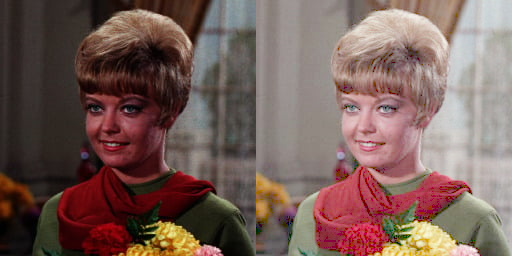

In [ ]:
print('Gamma Correction pada citra')
print('----------------------------------')

#meminta nilai Gamma dari pengguna
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, bukan angka')
    gamma = 1  # Set default value jika input tidak valid

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# Normalisasi nilai gamma
inv_gamma = 1.0 / gamma

# Mengakses per pixel dan menerapkan gamma correction
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # Normalisasi nilai pixel
            pixel = original[y, x, c] / 255.0
            # Menerapkan gamma correction
            gamma_pixel = np.power(pixel, inv_gamma) * 255
            # Menyimpan hasil gamma correction
            gamma_image[y, x, c] = np.clip(gamma_pixel, 0, 255)

# Cara simpel tanpa loop menggunakan cv2.pow
# gamma_image = cv.pow(original / 255.0, inv_gamma) * 255
# gamma_image = np.clip(gamma_image, 0, 255).astype(np.uint8)

# Menggabungkan gambar asli dan gambar hasil gamma correction
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

## Tugas 2: Simulasi image depth pada citra

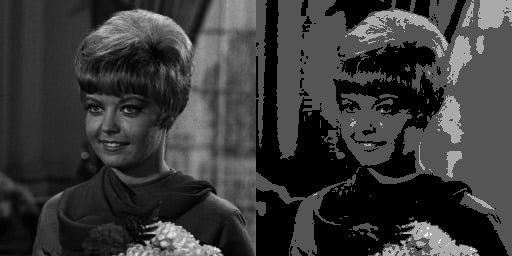

In [13]:
# Membaca gambar grayscale
image_path = '/content/drive/MyDrive/PCVK/Images/female.tiff'
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Memeriksa apakah gambar berhasil dibaca
if original is None:
    print(f"Error: Gambar tidak ditemukan di {image_path}")
else:
    # Membuat gambar kosong untuk menyimpan hasil konversi
    depth_image = np.zeros(original.shape, dtype=np.uint8)

    # Mengakses setiap pixel dan menerapkan konversi kedalaman bit
    for y in range(original.shape[0]):
        for x in range(original.shape[1]):
            # Menghitung nilai kedalaman berdasarkan bit depth
            depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)

    # Menampilkan gambar asli dan gambar kedalaman
    final_frame = cv.hconcat((original, depth_image))
    cv2_imshow(final_frame)

## Tugas 3: Modul average denoising pada citra